<a href="https://colab.research.google.com/github/dansecret/CNN_Tensorflow/blob/main/tensorRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir("gdrive/MyDrive/Colab Notebooks/tensorrt")

In [ ]:
!mkdir yolov8-tensorrt

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 8.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
%cd yolov8-tensorrt/

/content/gdrive/MyDrive/yolov8-tensorrt


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [ ]:
%pip install tensorrt==8.5.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.2/549.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: tensorrt
    Found existing installation: tensorrt 10.0.1
    Uninstalling tensorrt-10.0.1:
      Successfully uninstalled tensorrt-10.0.1


In [ ]:
%pip install tensorrt_lean==8.5.2

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt_lean: filename=tensorrt_lean-10.0.1-py2.py3-none-any.whl size=16401 sha256=4591b3fa671b12a15278aa767f862e853b0ce16931a00630c80559fd029060d0
  Stored in directory: /root/.cache/pip/wheels/22/cc/32/7b2dfc147ecd50018b8fd75a2ade737316c7752bdcecc5e9a1
  Created wheel for tensorrt_lean-cu12: filename=tensorrt_lean_cu12-10.0.1-py2.py3-none-any.whl size=17630 sha256=b3c682007e1d9bd5d78f07b57a3c5e1c5070f18a25bcb9682a1007ddaf5d3464
  Stored in directory: /root/.cache/pip/wheels/96/83/af/cc899c4d29bbbec0245dd453310759d89f9341bfbdeefb2114
Successfully built tensorrt_lean tensorrt_lean-cu12


In [ ]:
%pip install tensorrt_dispatch


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt_dispatch: filename=tensorrt_dispatch-10.0.1-py2.py3-none-any.whl size=16456 sha256=8bcd612c8c41e340ab7a29c751a874182fe19937519fed0a6fca88f714910aac
  Stored in directory: /root/.cache/pip/wheels/9c/38/31/a643e65167c4858628217fe13f1f418683e2a1097fc55e766c
  Created wheel for tensorrt_dispatch-cu12: filename=tensorrt_dispatch_cu12-10.0.1-py2.py3-none-any.whl size=17700 sha256=0bb319836fa505f53b81832ff9a1521292202a185cf1852cd5e925b466bb97eb
  Stored in directory: /root/.cache/pip/wheels/11/52/98/4819924991f35ca73119f15f086ef52cd607da93aa07bfcadb
Successfully built tensorrt_dispatch tensorrt_dispatch-cu12


In [ ]:
%pip install onnx onnxsim onnxruntime-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.8 MB/s eta 0:00:00


In [ ]:
import tensorrt
print(tensorrt.__version__)
assert tensorrt.Builder(tensorrt.Logger())

10.0.1


In [ ]:
!yolo export model=best.pt format=engine half=True device=0

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (21.5 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 3.0s, saved as 'best.onnx' (42.6 MB)

TensorRT: starting export with TensorRT 10.0.1...
[06/01/2024-09:56:48] [TRT] [I] [MemUsageChange] Init CUDA: CPU +2, GPU +0, now: CPU 575, GPU 691 (MiB)
[06/01/2024-09:56:49] [TRT] [I] [MemUsageChange] Init builder kernel library: CPU +945, GPU +178, now: CPU 1656, GPU 869 (MiB)
[06/01/2024-09:56:50] [TRT] [I] ----------------------------------------------------------------
[06/01/2024-09:56:50] [TRT] [I] Input filename:   best.onnx
[06/01/2024-09:56:50] [TRT] [I] ONNX IR version:  0.0.8
[06/01/2024-09:56:50] [TRT] [I] Opset version:    17
[06/01/2024-09:56:50] [TRT] [I] Producer name:    pytorc

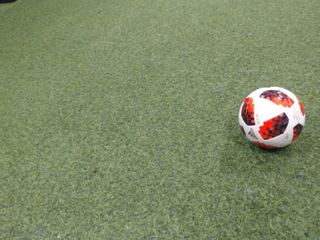

In [ ]:
from PIL import Image
from IPython.display import display

#load the image
image = Image.open("opencv_frame_0.jpg")

w, h = image.size
n_width = int(w/2)
n_height = int(h/2)

#resize
image = image.resize((n_width, n_height))

display(image)

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model1 = YOLO('best.engine')

results1 = model1(image)

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading best.engine for TensorRT inference...

0: 640x640 1 ball, 5.5ms
Speed: 70.7ms preprocess, 5.5ms inference, 1969.0ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# Load the YOLOv8 model
model2 = YOLO('best.pt')

results2 = model2(image)


0: 480x640 1 ball, 118.1ms
Speed: 8.1ms preprocess, 118.1ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
# Load the YOLOv8 model
model2 = YOLO('best.onnx')

results2 = model2(image)

NameError: name 'YOLO' is not defined